# Dataton Aiffel
* Group : EagleAI
* Dataset : 영화관 입장권 통합 전산망
* Name : 김용훈(Kim yonghun)

## Contents

1. Import libraries & load dataset
2. Data EDA
3. Data preprocessing
4. Visualization of first idea

## 1. Import libraries & load dataset

* if want to show korean on matplotlib, command annotation lines on termianl 
* set kor font in matplotlib using 'rc' function (나눔 고딕)

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

* load dataset
* show dataset shape and head

In [511]:
data = pd.read_csv('KOBIS.csv')
print(data.shape)
data.head()

(26197, 18)


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


## 2. Data EDA

* Check how many rows have null values.
* Visualization counts of null values in rows

Counts of rows having null values : 25179
Counts of rows having null values over 4 : 238


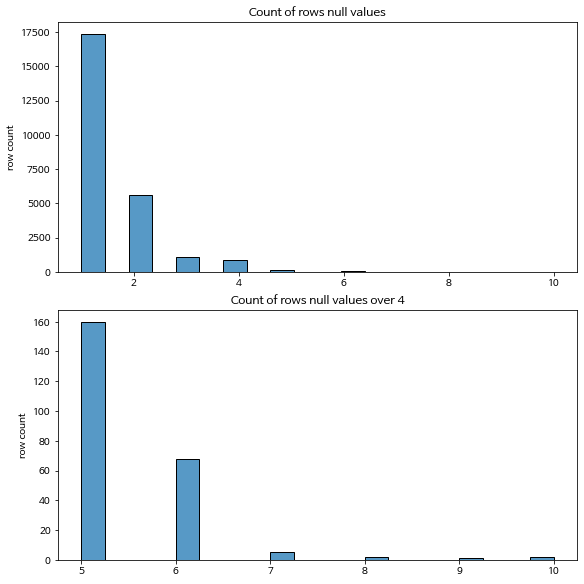

In [512]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 0 ]
print("Counts of rows having null values :", len(data_null))
data_null2 = data_null[data_null.values > 4]
print("Counts of rows having null values over 4 :", len(data_null2))

fig, ax = plt.subplots(2,1,constrained_layout=True, figsize = (8,8))
ax[0].set_title("Count of rows null values")
sns.histplot(x=data_null.values, ax = ax[0], bins=20)
ax[0].set_ylabel('row count')
ax[1].set_title("Count of rows null values over 4")
sns.histplot(x=data_null2.values, ax = ax[1], bins=20)
ax[1].set_ylabel('row count')

plt.show()

* Delete rows having over 5 null values(78 count)

In [513]:
data_null = data_null[data_null.values > 5]
print('Count :', len(data_null))
data = data.drop(data_null.index)

Count : 78


* Check which columns have null values.

In [514]:
data_null = data.isnull().any()
data_null = data_null[data_null.values == True]
data_null_col = data_null.index
data_null_col

Index(['Director', 'Production_Company', 'Import_Company',
       'Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality',
       'National_Sales', 'Seoul_Sales', 'Genre', 'Rating'],
      dtype='object')

* Visualization how many columns have null values

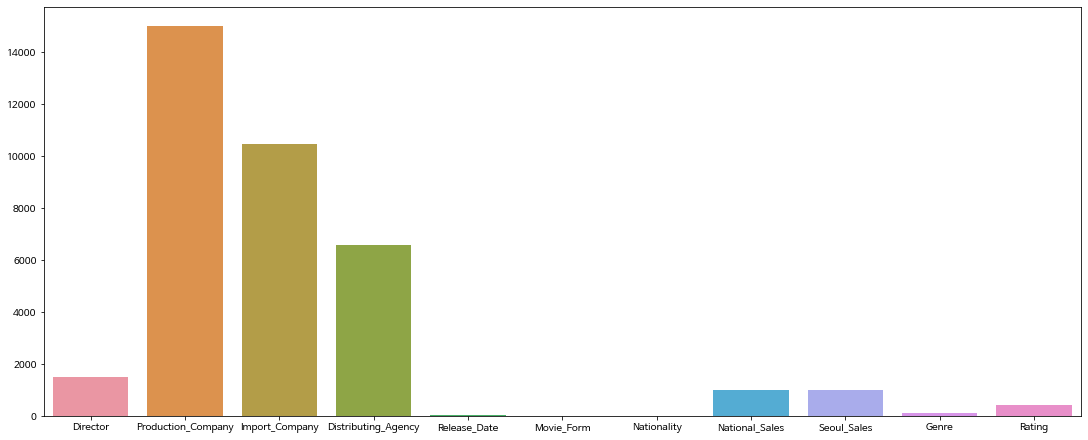

In [515]:
data_null = data.isnull().sum(axis = 0)
data_null = data_null[data_null_col]
# data_null.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(constrained_layout=True, figsize = (15,6))
sns.barplot(x=data_null.index, y=data_null.values)

plt.show()

## 3. Data preprocessing

1. Divides by what column datatype
   - numeric no null :  
      1. 'ID'  
      2. 'National_number_screens'    
      3. 'National_Audience'  
      4. 'Seoul_Audience'  
   - numeric have null :  
      1. 'National_Sales'  
      2. 'Seoul_Sales'  
   - datetime :  
      * Release_date  
   - string have null :  
      1. 'Director'  
      2. 'Production_Company'  
      3. 'Import_Company'  
      4. 'Distributing_Agency'  
      5. 'Moive_Form'  
      6. 'Nationality'  
      7. 'Genre'  
      8. 'Rating'
    - string no null :  
      1. 'Movie_Name'
      2. 'Movie_Type'
      3. 'Movie_Classification'
2. Data preprocessing numeric columns
3. Data preprocessing string columns

Fill null value with '0' in numeric_columns have string values

In [516]:
num_columns_null = ['National_Sales','Seoul_Sales']
data[num_columns_null] = data[num_columns_null].fillna('-1')
data[num_columns_null].isna().sum()

National_Sales    0
Seoul_Sales       0
dtype: int64

Change num_columns value type to integer

In [517]:
num_columns = ['National_number_screens', 'National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']
for i in num_columns:
    data[i] = data[i].str.replace(",","").astype('float')

In [518]:
data.sort_values('National_Audience').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
13130,13131,꿈이 지나간 자리,J. 마이클 맥클러리,어거스트엔터테인먼트,(주)서강기획,NaN,1995-05-05,개봉영화,장편,미국,0.0,0.0,0.0,0.0,1085.0,드라마,고등학생이상관람가,일반영화
7662,7663,복수무정,NaN,워너브러더스사㈜,워너브러더스 코리아(주),워너 브러더스 픽쳐스,1990-08-18,개봉영화,장편,미국,0.0,0.0,0.0,0.0,11547.0,액션,고등학생이상관람가,일반영화
7663,7664,요화경,박호태,문태선프로덕션,NaN,NaN,1988-03-12,개봉영화,장편,한국,0.0,0.0,0.0,0.0,11539.0,사극,연소자관람불가,일반영화
7664,7665,무사쥬베이,카와지리 요시아키,NaN,(주)유림엔터테인먼트,NaN,2000-09-30,개봉영화,장편,일본,0.0,0.0,0.0,0.0,11536.0,애니메이션,18세관람가,독립/예술영화
7665,7666,겨울에 내리는 봄비,김기,동아흥행㈜,NaN,NaN,1981-02-14,개봉영화,장편,한국,0.0,0.0,0.0,0.0,11535.0,멜로/로맨스,연소자관람불가,일반영화


In [519]:
data.sort_values('National_Sales').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
4228,4229,어머니 왜 나를 낳으셨나요,김묵,신창필름,NaN,NaN,1972-06-03,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,51491.0,NaN,전체관람가,일반영화
2257,2258,스웜,어윈 알렌,워너 브러더스 픽쳐스,세경흥업(주),NaN,1979-03-31,개봉영화,장편,미국,0.0,-1.0,0.0,-1.0,142062.0,공포(호러),NaN,일반영화
6912,6913,일요일의 손님들,김수용,세경흥업(주),NaN,NaN,1973-10-20,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,15704.0,멜로/로맨스,12세이상관람가,일반영화
10812,10813,이조 상노비사,최인현,대영영화주식회사,NaN,NaN,1975-01-25,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,3210.0,사극,15세이상관람가,일반영화
4620,4621,고교 꺼꾸리군 장다리군,석래명,삼영필림,NaN,NaN,1977-06-14,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,42779.0,드라마,12세이상관람가,일반영화


show how many 0 values in columns

In [520]:
data.sort_values('Seoul_Audience').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
26196,26197,av감독의 아내,쿠도 마사노리,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-22,개봉영화,장편,일본,1.0,8000.0,1.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화
21748,21749,변태작가의 색스런 이야기,NaN,NaN,주식회사 미콘,주식회사 미콘,2020-02-07,개봉영화,장편,일본,1.0,1000.0,1.0,0.0,0.0,드라마,청소년관람불가,일반영화
21749,21750,변태정력왕 : 투명인간의탄생,오쿠 와타루,NaN,(주)에스와이미디어,(주)에스와이미디어,2017-05-15,개봉영화,장편,일본,1.0,5000.0,1.0,0.0,0.0,기타,청소년관람불가,일반영화
21750,21751,변태커플 스와핑,나카메구로 코우지,NaN,(주)플라이어,(주)플라이어,2016-06-03,개봉영화,장편,일본,1.0,8000.0,1.0,0.0,0.0,드라마,청소년관람불가,일반영화
21751,21752,변했다! 내 남자의 맛,제너럴리스트,(주)뮤직엔닷컴,NaN,(주)뮤직엔닷컴,2022-05-31,개봉영화,장편,한국,1.0,100000.0,20.0,0.0,0.0,성인물(에로),청소년관람불가,일반영화


In [521]:
data.sort_values('Seoul_Sales').head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
13122,13123,흑야,이두용,합동영화(주),NaN,NaN,1975-12-13,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,1089.0,드라마,12세이상관람가,일반영화
1417,1418,속 써스페리아,다리오 아르젠토,NaN,연방영화(주),NaN,1978-12-24,개봉영화,장편,이탈리아,0.0,-1.0,0.0,-1.0,241806.0,공포(호러),청소년관람불가,일반영화
4000,4001,무림대협,김선경,동아흥행㈜,NaN,NaN,1979-06-23,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,57333.0,액션,국민학생관람불가,일반영화
6281,6282,무림 악인전,김정용,한진흥업주식회사,NaN,NaN,1980-04-10,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,20342.0,사극,연소자관람불가,일반영화
4008,4009,마음 약해서,심우섭,태창흥업,NaN,NaN,1980-01-12,개봉영화,장편,한국,0.0,-1.0,0.0,-1.0,57089.0,코미디,국민학생관람불가,일반영화


In [522]:
from collections import Counter

# num_columns = ['National_number_screens', 'National_Audience', 'National_Sales', 'Seoul_Audience','Seoul_Sales']

print(data.shape)

print("0 values")
for i in num_columns:
    print(i, ':' ,Counter(data[i])[0])

print("-1 values(null)")
for i in num_columns:
    print(i, ':' ,Counter(data[i])[-1])

(26119, 18)
0 values
National_number_screens : 8805
National_Audience : 7308
National_Sales : 7866
Seoul_Audience : 6654
Seoul_Sales : 14392
-1 values(null)
National_number_screens : 0
National_Audience : 0
National_Sales : 983
Seoul_Audience : 0
Seoul_Sales : 989


Fill null values with 'No_column_name' in  
['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Genre']

In [523]:
# string_columns = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality', 'Genre', 'Rating']
string_columns1 = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Movie_Form', 'Genre']
data[string_columns1].isnull().sum()

Director                1499
Production_Company     15002
Import_Company         10477
Distributing_Agency     6573
Movie_Form                 8
Genre                    121
dtype: int64

In [524]:
for i in string_columns1:
    data[i] = data[i].fillna('No_'+ i)
# data.head()
# data[string_columns1].isnull().sum()

Search and fill Nationality column null values

In [525]:
data[data['Nationality'].isnull()]

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
251,252,오! 브라더스,No_Director,No_Production_Company,No_Import_Company,No_Distributing_Agency,2003-09-05,개봉영화,장편,NaN,0.0,0.0,3148748.0,0.0,952010.0,코미디,15세관람가,일반영화
3805,3806,필사의 탈출,러스 메이버리,No_Production_Company,연방영화(주),No_Distributing_Agency,1976-03-20,개봉영화,장편,NaN,0.0,0.0,0.0,0.0,63727.0,드라마,NaN,일반영화
6802,6803,신촉산,서극,No_Production_Company,(주)건화상사,No_Distributing_Agency,1983-04-23,개봉영화,단편,NaN,0.0,0.0,0.0,0.0,16422.0,액션,NaN,일반영화
23940,23941,우리는그들을잊으려한다,다코 베직,No_Production_Company,No_Import_Company,No_Distributing_Agency,1992-03-27,개봉영화,No_Movie_Form,NaN,0.0,0.0,0.0,0.0,0.0,드라마,고등학생이상관람가,일반영화


* 오! 브라더스 : 한국  
* 필사의 탈출 : 미국  
* 신촉산 : 홍콩  
* 우리는그들을잊으려한다 : 유고슬라비아  
We have to see that values in columns

In [526]:
Nationality_columns = ['한국','미국','홍콩','유고슬라비아']
for i in Nationality_columns:
    print(i in set(data['Nationality']))

True
True
True
True


All values also in column  
so, add values in each rows

In [527]:
data.loc[251 , 'Nationality' ] = '한국'
data.loc[3805 , 'Nationality' ] = '미국'
data.loc[6802 , 'Nationality' ] = '홍콩'
data.loc[23940 , 'Nationality' ] = '유고슬라비아'
data.loc[[251, 3805, 6802, 23940]]

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
251,252,오! 브라더스,No_Director,No_Production_Company,No_Import_Company,No_Distributing_Agency,2003-09-05,개봉영화,장편,한국,0.0,0.0,3148748.0,0.0,952010.0,코미디,15세관람가,일반영화
3805,3806,필사의 탈출,러스 메이버리,No_Production_Company,연방영화(주),No_Distributing_Agency,1976-03-20,개봉영화,장편,미국,0.0,0.0,0.0,0.0,63727.0,드라마,NaN,일반영화
6802,6803,신촉산,서극,No_Production_Company,(주)건화상사,No_Distributing_Agency,1983-04-23,개봉영화,단편,홍콩,0.0,0.0,0.0,0.0,16422.0,액션,NaN,일반영화
23940,23941,우리는그들을잊으려한다,다코 베직,No_Production_Company,No_Import_Company,No_Distributing_Agency,1992-03-27,개봉영화,No_Movie_Form,유고슬라비아,0.0,0.0,0.0,0.0,0.0,드라마,고등학생이상관람가,일반영화


Rating and Release Date have null values

For preprocessing Rating column, we make new csv file match score

In [528]:
df_Rating = pd.read_csv('Rating.csv')
print(df_Rating.shape)
print(set(df_Rating['score']))
df_Rating.head()

(55, 2)
{'X', '15', 'ALL', '18', '12', 'ETC'}


,Rating,score
0,12세 미만인 자는 관람할 수 없는 등급,12
1,12세관람가,12
2,12세이상관람가,12
3,"12세이상관람가,12세관람가",12
4,"12세이상관람가,15세 미만인 자는 관람할 수 없는 등급",15


Replace 'Rating' column values using new csv file 'Rating' 
fill 'Rating' null value to 'ETC'

In [529]:
for i in range(len(df_Rating)):
    data.replace(df_Rating['Rating'][i], df_Rating['score'][i], inplace = True)
    # print(df_Rating['Rating'][i], df_Rating['score'][i])

# data['Rating']
data['Rating'].fillna('ETC', inplace = True)
data['Rating']
set(data['Rating'])

{'12', '15', '18', 'ALL', 'ETC', 'X'}

'Release Date' value change to datetime

In [530]:
# Convert Release_Date to datetime value
import datetime

data['Release_Date'] = pd.to_datetime(data['Release_Date'], format = "%Y-%m-%d")

data['Release_Date'].dt.year
data['year'] = data['Release_Date'].dt.year

data['Release_Date'].dt.month
data['month'] = data['Release_Date'].dt.month

data['Release_Date'].dt.day
data['day'] = data['Release_Date'].dt.day

data['year'] = data['year'].fillna(0)
data['year'].isna().sum()

data['month'] = data['month'].fillna(0)
data['month'].isna().sum()

data['day'] = data['day'].fillna(0)
data['day'].isna().sum()

data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,...,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification,year,month,day
0,1,명량,김한민,(주)빅스톤픽쳐스,No_Import_Company,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,...,1.357484e+11,17613682.0,3.312123e+10,4163666.0,사극,15,일반영화,2014.0,7.0,30.0
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,...,1.284471e+11,13624328.0,4.054752e+10,3993374.0,SF,12,독립/예술영화,2009.0,12.0,17.0
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",No_Import_Company,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,...,0.000000e+00,12302831.0,0.000000e+00,3660842.0,드라마,15,일반영화,2005.0,12.0,29.0
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",No_Import_Company,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,...,1.396480e+11,16264944.0,3.185866e+10,3638287.0,코미디,15,일반영화,2019.0,1.0,23.0
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",No_Production_Company,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,...,1.221827e+11,13934592.0,3.357714e+10,3597963.0,액션,12,일반영화,2019.0,4.0,24.0


Null value 출력

In [531]:
data_null = data.isnull().sum(axis = 0)
data_null

ID                          0
Movie_Name                  0
Director                    0
Production_Company          0
Import_Company              0
Distributing_Agency         0
Release_Date               18
Movie_Type                  0
Movie_Form                  0
Nationality                 0
National_number_screens     0
National_Sales              0
National_Audience           0
Seoul_Sales                 0
Seoul_Audience              0
Genre                       0
Rating                      0
Movie_Classification        0
year                        0
month                       0
day                         0
dtype: int64

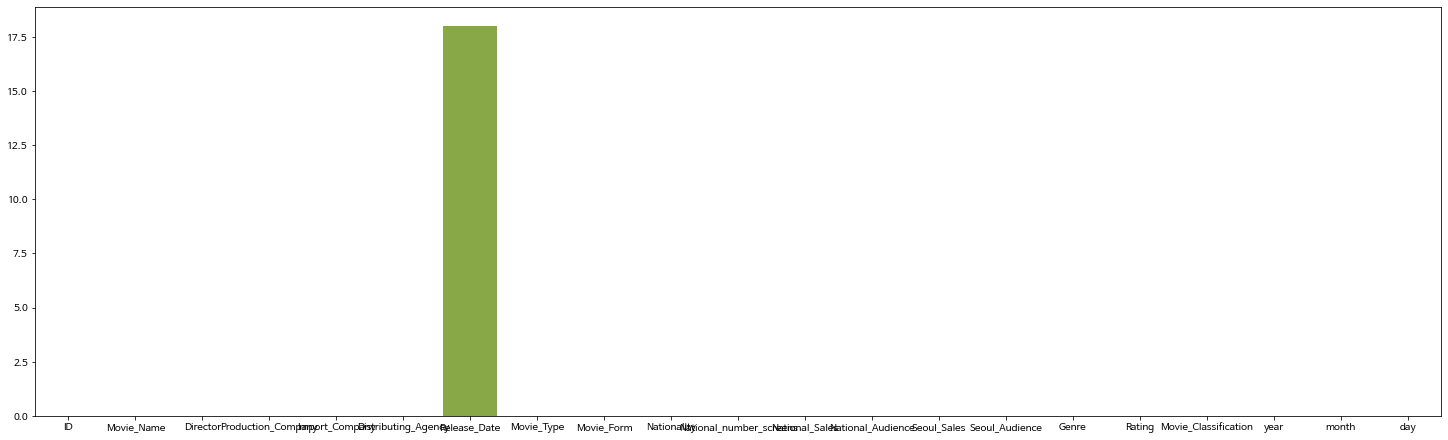

In [532]:
fig, ax = plt.subplots(constrained_layout=True, figsize = (20,6))
sns.barplot(x=data_null.index, y=data_null.values)
plt.show()

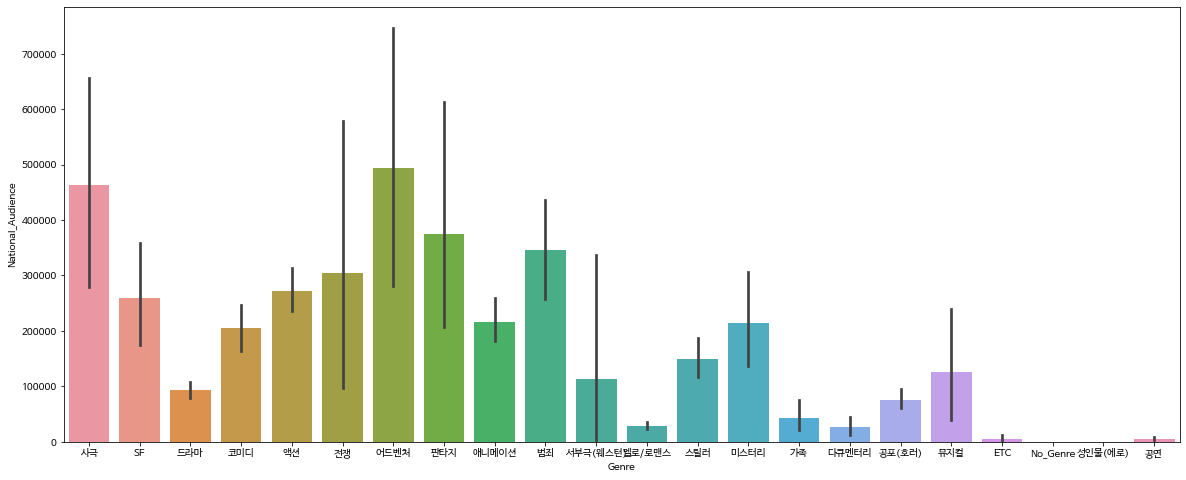

In [533]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x=data['Genre'], y=data['National_Audience'])
plt.show()

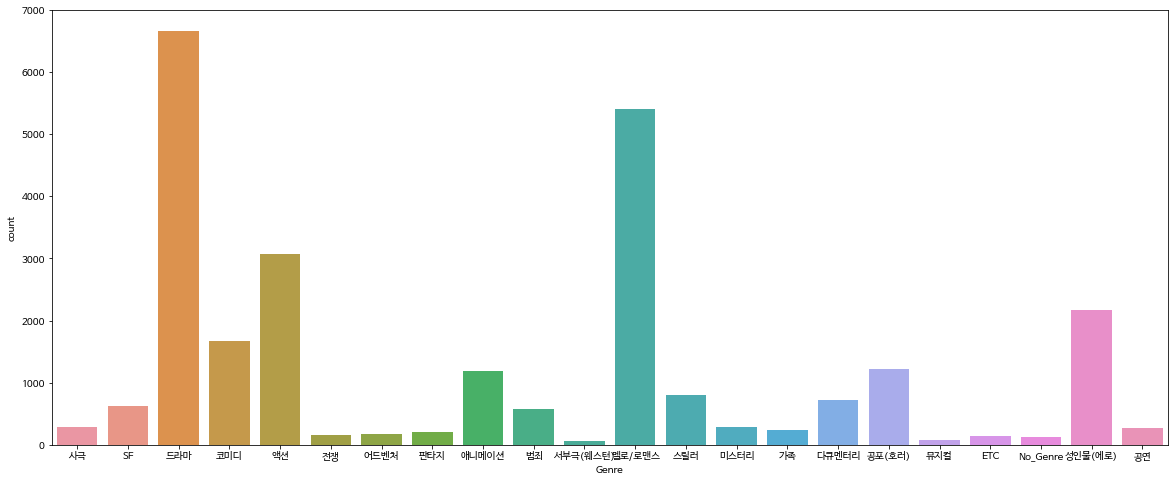

In [534]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x=data['Genre'])
plt.show()

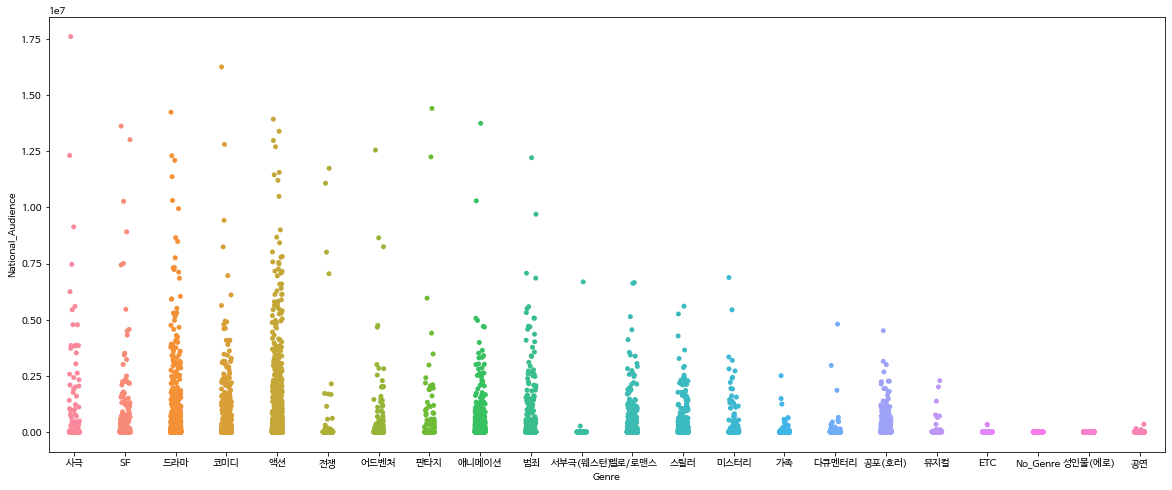

In [535]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.stripplot(x=data['Genre'], y=data['National_Audience'])
plt.show()